# UCD ECO Python Tools - Tutorial

In [1]:
import pandas as pd
import os
import requests as req
import json
import numpy as np
import datetime

from matplotlib import style
import matplotlib
%matplotlib inline
style.use('ggplot')

#  new modules - marco.pritoni@gmail.com
from PIPy_Datalink import *
from Data_Preprocessor import *

## PI datalink - Python implementation

In [2]:
p=pipy_datalink()

https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/A0EbgZy4oKQ9kiBiZJTW7eugwNFN9S7KS5BG0-xgDcyrprwDXFgAtlASVonZNgP17EChQVVRJTC1BRlxDRUZTXFVDREFWSVNcQlVJTERJTkdTXFBMQU5UICYgRU5WSVJPTk1FTlRBTCBTQ0lFTkNFU1xFTEVDVFJJQ0lUWXxERU1BTkRfS0JUVQ/interpolated
<Response [200]>
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/A0EbgZy4oKQ9kiBiZJTW7eugwNFN9S7KS5BG0-xgDcyrprwDXFgAtlASVonZNgP17EChQVVRJTC1BRlxDRUZTXFVDREFWSVNcQlVJTERJTkdTXFBMQU5UICYgRU5WSVJPTk1FTlRBTCBTQ0lFTkNFU1xFTEVDVFJJQ0lUWXxERU1BTkRfS0JUVQ/interpolated
<Response [200]>


,UnknownName
2016-01-22 08:00:00,1129.0
2016-01-22 09:00:00,1092.0
2016-01-22 10:00:00,1109.0
2016-01-22 11:00:00,1112.0
2016-01-22 12:00:00,1133.0


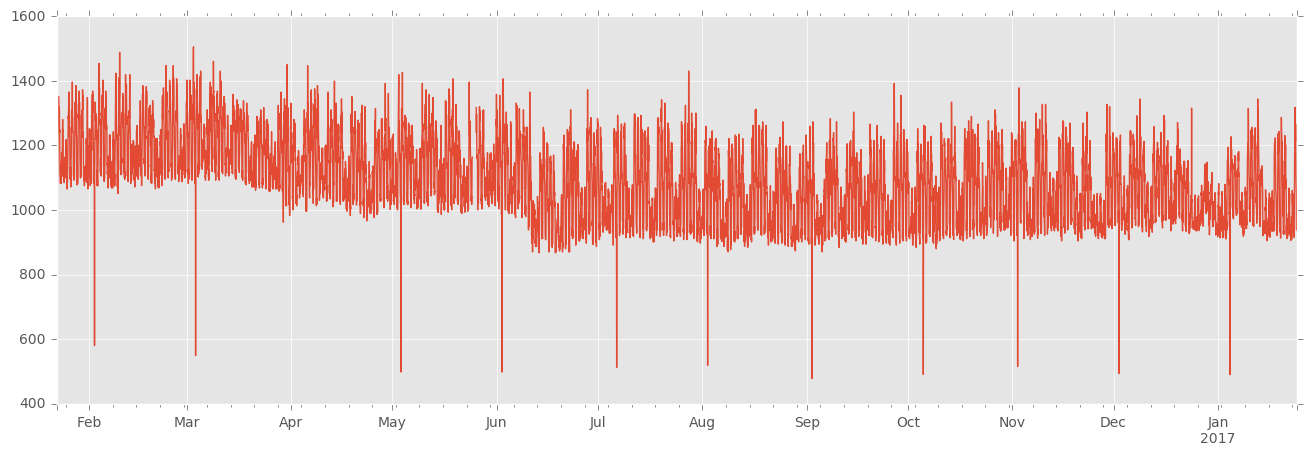

In [3]:
## method get_stream()
## get the stream by WebID
## input: Web ID
## 
## output: pandas DataFrame/dictionary
##
## arguments: 
## Web_ID=None : - the unique identifier of the time series 
## _start="y" : - start date, default yesterday "y"; can use different formats as "YYYY-MM-DD";
## _end="t" : - end date, default yesterday "t"; can use different formats as "YYYY-MM-DD";        
## _calculation="interpolated": can use "recorded" to get raw data and summary to get summary data (tot, mean, sd);
## note: summary data is not a time series, but a dictionary
## _interval="1h": interpolation interval, used only with interpolated; default 1 hour
## _controller=None : not used at the moment; needed for future extensions 
#  _sumType=None : used if calculation is "summary", can use All, Total, default Total
#  _label=None : not used at the moment; needed for future extensions 

Web_ID="A0EbgZy4oKQ9kiBiZJTW7eugwNFN9S7KS5BG0-xgDcyrprwDXFgAtlASVonZNgP17EChQVVRJTC1BRlxDRUZTXFVDREFWSVNcQlVJTERJTkdTXFBMQU5UICYgRU5WSVJPTk1FTlRBTCBTQ0lFTkNFU1xFTEVDVFJJQ0lUWXxERU1BTkRfS0JUVQ"

# plot and show results
p.get_stream(Web_ID,_start="2016-01-22", _end="2017-01-24", _label="UnknownName").plot(figsize=(16,5), legend=False)
p.get_stream(Web_ID,_start="2016-01-22", _end="2017-01-24",_label="UnknownName").head()

In [4]:
## example using the _calculation="summary"
Web_ID="A0EbgZy4oKQ9kiBiZJTW7eugwNFN9S7KS5BG0-xgDcyrprwDXFgAtlASVonZNgP17EChQVVRJTC1BRlxDRUZTXFVDREFWSVNcQlVJTERJTkdTXFBMQU5UICYgRU5WSVJPTk1FTlRBTCBTQ0lFTkNFU1xFTEVDVFJJQ0lUWXxERU1BTkRfS0JUVQ"

# plot and show results
p.get_stream(Web_ID,_start="2017-01-22", _end="2017-01-24", _calculation="summary",_sumType="All",_label="UnknownName")

https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/A0EbgZy4oKQ9kiBiZJTW7eugwNFN9S7KS5BG0-xgDcyrprwDXFgAtlASVonZNgP17EChQVVRJTC1BRlxDRUZTXFVDREFWSVNcQlVJTERJTkdTXFBMQU5UICYgRU5WSVJPTk1FTlRBTCBTQ0lFTkNFU1xFTEVDVFJJQ0lUWXxERU1BTkRfS0JUVQ/summary
<Response [200]>


,UnknownName
Count,172800.000000
PopulationStdDev,112.734120
PercentGood,100.000000
Average,1021.991123
Maximum,1381.517456
Range,503.370850
Minimum,878.146606
StdDev,112.734120
Total,2043.982246


P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q/interpolated
<Response [200]>


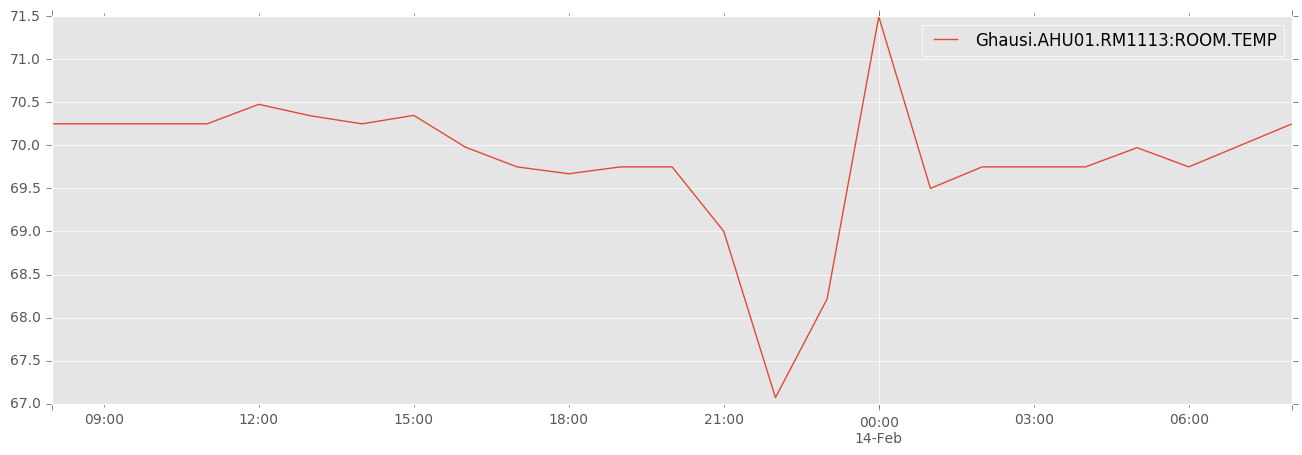

In [5]:
## get_stream_by_point()
##
## getting the data by WebIDs is not pratical
## we want to get the data by data point name 
## 
## input: point name; can use *  
##
## output: pandas DataFrame/dictionary
##
##
## arguments: 
## point_name : - the name is unique in each database 
## _start="y" : - start date, default yesterday "y"; can use different formats as "YYYY-MM-DD";
## _end="t" : - end date, default yesterday "t"; can use different formats as "YYYY-MM-DD";        
## _calculation="interpolated": can use "recorded" to get raw data and summary to get summary data (tot, mean, sd);
## note: summary data is not a time series, but a dictionary
## _interval="1h": interpolation interval, used only with interpolated; default 1 hour
## _controller=None : not used at the moment; needed for future extensions 
#  _sumType=None : used if calculation is "summary", can use All, Total, default Total
#  _label=None : not used at the moment; needed for future extensions 
# dataserver : there can be more databases in a PI environment; default "s09KoOKByvc0-uxyvoTV1UfQVVRJTC1QSS1Q"

point_name="Ghausi.AHU01.RM1113:ROOM.TEMP"

p.get_stream_by_point(point_name).plot(figsize=(16,5))

Ghausi.AHU01.RM1113:ROOM.TEMP
P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q/interpolated
<Response [200]>
Ghausi.AHU01.RM1113:ROOM.DAT
P09KoOKByvc0-uxyvoTV1UfQtWMAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5EQVQ
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQtWMAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5EQVQ/interpolated
<Response [200]>
Ghausi.AHU01.RM1113:ROOM.TEMP
P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q/interpolated
<Response [200]>
Ghausi.AHU01.RM1113:ROOM.DAT
P09KoOKByvc0-uxyvoTV1UfQtWMAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5EQVQ
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/st

,Ghausi.AHU01.RM1113:ROOM.TEMP,Ghausi.AHU01.RM1113:ROOM.DAT
2017-02-13 08:00:00,70.250000,68.540510
2017-02-13 09:00:00,70.250000,69.000000
2017-02-13 10:00:00,70.250000,68.465300
2017-02-13 11:00:00,70.250000,68.437965
2017-02-13 12:00:00,70.476654,68.565240


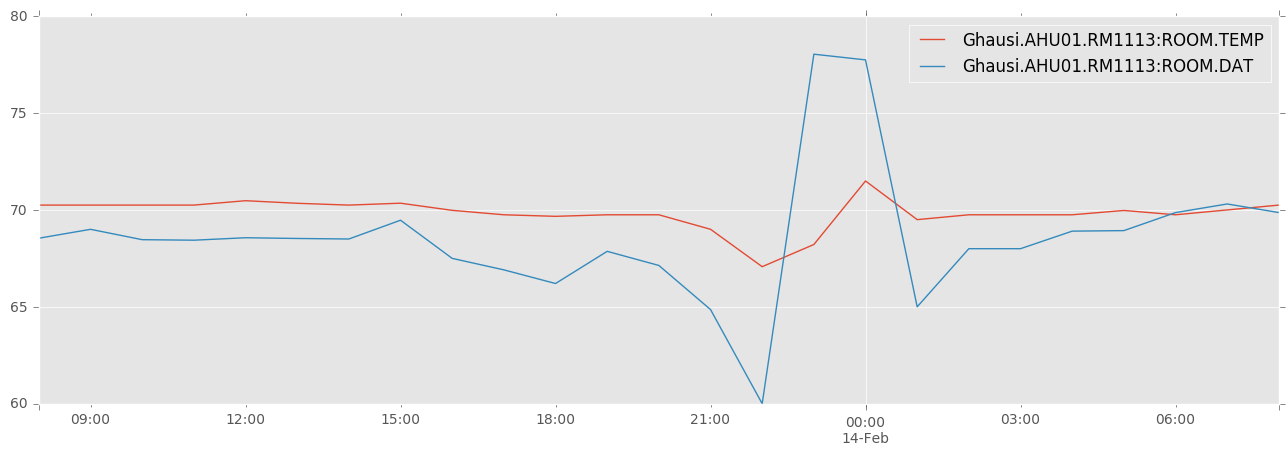

In [6]:
# test this with multiple point names

point_nm=["Ghausi.AHU01.RM1113:ROOM.TEMP","Ghausi.AHU01.RM1113:ROOM.DAT"]

p.get_stream_by_point(point_nm).plot(figsize=(16,5))
p.get_stream_by_point(point_nm).head()

In [7]:
# show that also the summary works for multiple columns
p.get_stream_by_point(point_nm,_start="2017-01-22", _end="2017-01-24", _calculation="summary",_sumType="All",_label="UnknownName")

Ghausi.AHU01.RM1113:ROOM.TEMP
P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q/summary
<Response [200]>
Ghausi.AHU01.RM1113:ROOM.DAT
P09KoOKByvc0-uxyvoTV1UfQtWMAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5EQVQ
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQtWMAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5EQVQ/summary
<Response [200]>


,Ghausi.AHU01.RM1113:ROOM.TEMP,Ghausi.AHU01.RM1113:ROOM.DAT
Count,172800.000000,172800.000000
PopulationStdDev,0.271145,0.927055
PercentGood,99.967414,99.967414
Average,69.951389,68.914344
Maximum,70.750000,71.000000
Range,1.250000,4.500000
Minimum,69.500000,66.500000
StdDev,0.271145,0.927055
Total,139.902778,137.828688


In [14]:
# test of calculatio _end
point_nm=["Ghausi.AHU01.RM1113:ROOM.TEMP","Ghausi.AHU01.RM1113:ROOM.DAT"]

p.get_stream_by_point(point_nm,_start="2017-01-22", _end="2017-01-24", _calculation="end",_sumType="All",_label="UnknownName")

Ghausi.AHU01.RM1113:ROOM.TEMP
P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q/end
<Response [200]>
Ghausi.AHU01.RM1113:ROOM.DAT
P09KoOKByvc0-uxyvoTV1UfQtWMAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5EQVQ
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQtWMAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5EQVQ/end
<Response [200]>


,Ghausi.AHU01.RM1113:ROOM.TEMP,Ghausi.AHU01.RM1113:ROOM.DAT
Timestamp,2017-02-14T23:52:42.7340087Z,2017-02-14T23:45:30.123001Z
Good,True,True
Value,69.75,68.5


In [15]:
## search_by_point()
## method to search for data points names using * 
##
## output: list of point names and dictionary of point name: WebIDs

l, d = p.search_by_point("OAT")
l

[u'OAT']

In [9]:
d

{u'Ghausi.AHU01.RM1113.ACH': u'P09KoOKByvc0-uxyvoTV1UfQQ6QCAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTMuQUNI',
 u'Ghausi.AHU01.RM1113.CFM CURRENT TO STPT RATIO': u'P09KoOKByvc0-uxyvoTV1UfQ-qACAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTMuQ0ZNIENVUlJFTlQgVE8gU1RQVCBSQVRJTw',
 u'Ghausi.AHU01.RM1113.CFM CURRENT TO STPT RATIO%': u'P09KoOKByvc0-uxyvoTV1UfQMaICAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTMuQ0ZNIENVUlJFTlQgVE8gU1RQVCBSQVRJTyU',
 u'Ghausi.AHU01.RM1113.CONTROL AIRFLOW MAXIMUM': u'P09KoOKByvc0-uxyvoTV1UfQbZ8CAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTMuQ09OVFJPTCBBSVJGTE9XIE1BWElNVU0',
 u'Ghausi.AHU01.RM1113.CONTROL AIRFLOW MINIMUM': u'P09KoOKByvc0-uxyvoTV1UfQbp8CAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTMuQ09OVFJPTCBBSVJGTE9XIE1JTklNVU0',
 u'Ghausi.AHU01.RM1113.Canopy Hood High Daily Duration': u'P09KoOKByvc0-uxyvoTV1UfQcoEBAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTMuQ0FOT1BZIEhPT0QgSElHSCBEQUlMWSBEVVJBVElPTg',
 u'Ghausi.AHU01.RM1113.Canopy Hood High Monthly Duration': u'P09KoOKByvc0-uxyvoTV1UfQC

## Clean Data 

In [10]:
# find meters at Ghausi Hall
p.search_by_point("Ghausi*BTU")

([u'Ghausi_ChilledWater_Demand_kBtu',
  u'Ghausi_Electricity_Demand_kBtu',
  u'Ghausi_Steam_Demand_kBtu'],
 {u'Ghausi_ChilledWater_Demand_kBtu': u'P09KoOKByvc0-uxyvoTV1UfQ1yMAAAVVRJTC1QSS1QXEdIQVVTSV9DSElMTEVEV0FURVJfREVNQU5EX0tCVFU',
  u'Ghausi_Electricity_Demand_kBtu': u'P09KoOKByvc0-uxyvoTV1UfQdBkAAAVVRJTC1QSS1QXEdIQVVTSV9FTEVDVFJJQ0lUWV9ERU1BTkRfS0JUVQ',
  u'Ghausi_Steam_Demand_kBtu': u'P09KoOKByvc0-uxyvoTV1UfQ2CMAAAVVRJTC1QSS1QXEdIQVVTSV9TVEVBTV9ERU1BTkRfS0JUVQ'})

Ghausi_ChilledWater_Demand_kBtu
P09KoOKByvc0-uxyvoTV1UfQ1yMAAAVVRJTC1QSS1QXEdIQVVTSV9DSElMTEVEV0FURVJfREVNQU5EX0tCVFU
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQ1yMAAAVVRJTC1QSS1QXEdIQVVTSV9DSElMTEVEV0FURVJfREVNQU5EX0tCVFU/interpolated
<Response [200]>
Ghausi_Electricity_Demand_kBtu
P09KoOKByvc0-uxyvoTV1UfQdBkAAAVVRJTC1QSS1QXEdIQVVTSV9FTEVDVFJJQ0lUWV9ERU1BTkRfS0JUVQ
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQdBkAAAVVRJTC1QSS1QXEdIQVVTSV9FTEVDVFJJQ0lUWV9ERU1BTkRfS0JUVQ/interpolated
<Response [200]>
Ghausi_Steam_Demand_kBtu
P09KoOKByvc0-uxyvoTV1UfQ2CMAAAVVRJTC1QSS1QXEdIQVVTSV9TVEVBTV9ERU1BTkRfS0JUVQ
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQ2CMAAAVVRJTC1QSS1QXEdIQVVTSV9TVEVBTV9ERU1BTkRfS0JUVQ/interpolated
<Response [200]>


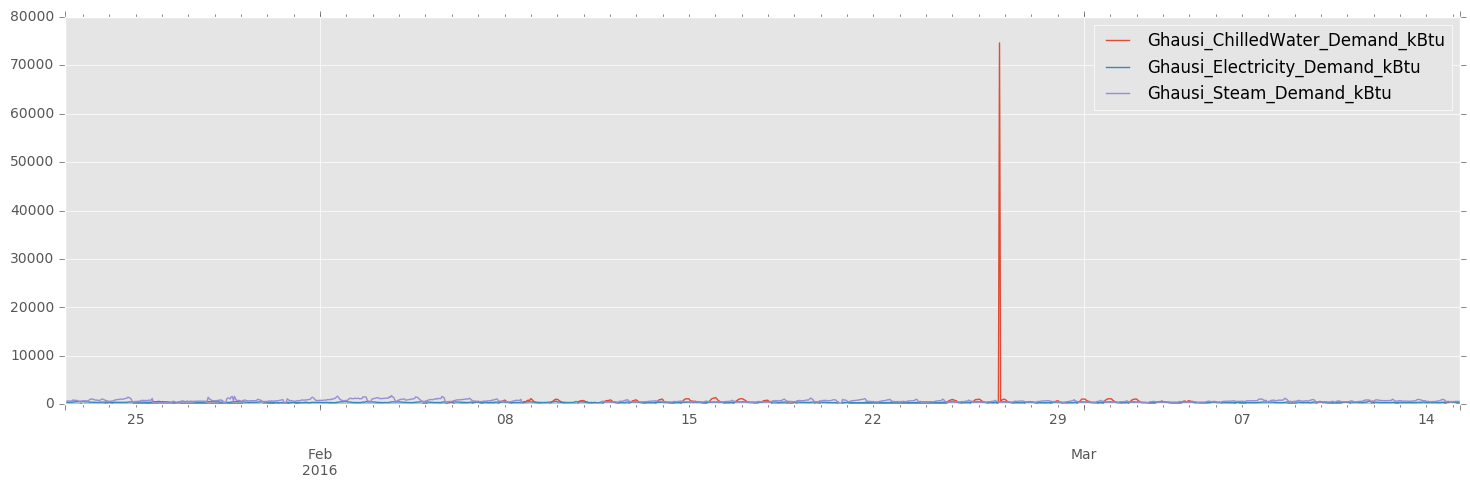

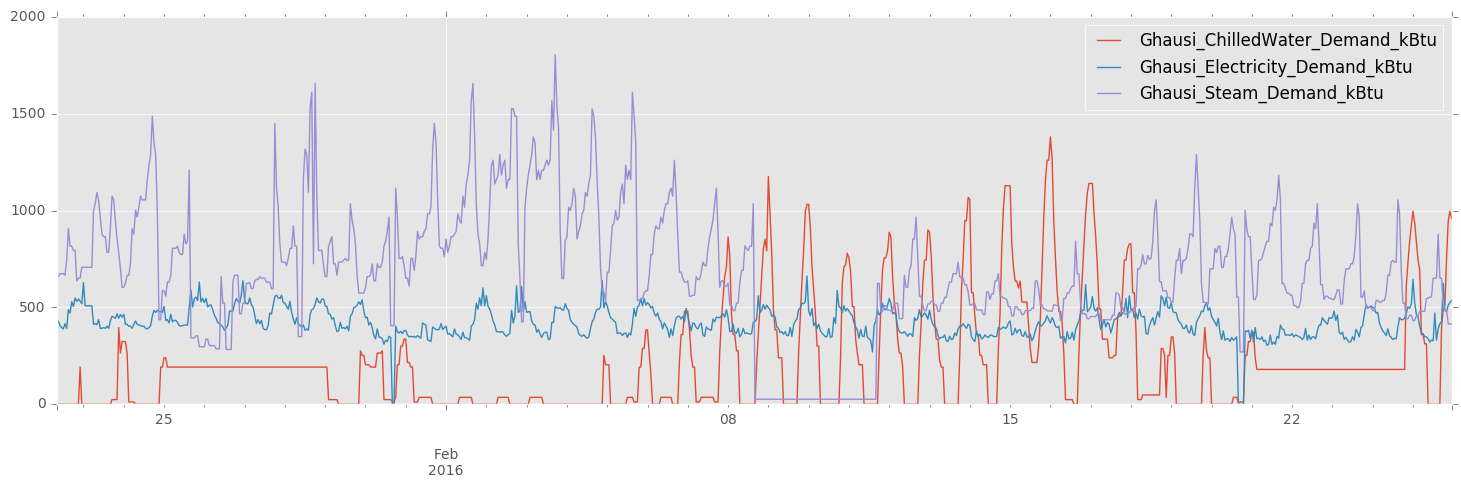

In [11]:
# select all three meters and plot them;  clearly see the outliers
point_names= ['Ghausi_ChilledWater_Demand_kBtu','Ghausi_Electricity_Demand_kBtu','Ghausi_Steam_Demand_kBtu']
dr=p.get_stream_by_point(point_names,_start="2016-01-22", _end="2016-03-15")
dr.plot(figsize=(18,5))

#show data before the spike
tSlicer=(slice("2016-01","2016-02-25"))

dr.loc[tSlicer,:].plot(figsize=(18,5))

debugging
_interpolate works
_removeNA works
_removeOutliers works
_removeOutOfBound works
_resampleData works


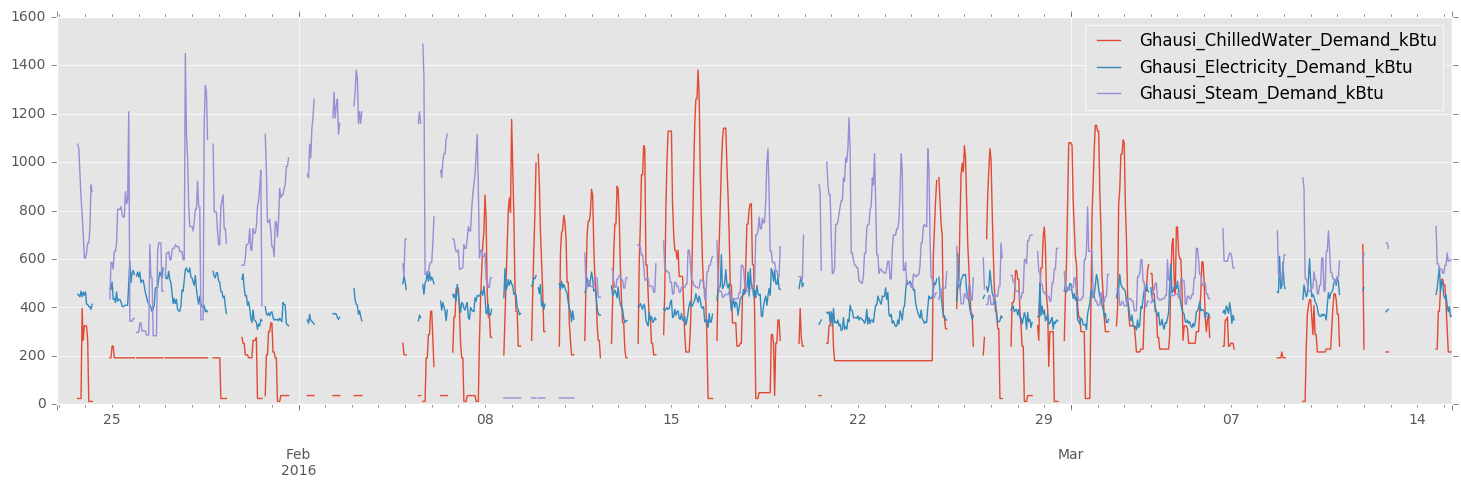

In [12]:
# run the data through data cleaning (all default inputs)
dp=data_preprocessor(dr)
tSlicer=(slice(None))
dp.data_cleaned.loc[tSlicer,:].plot(figsize=(18,5))

debugging
_removeOutliers works


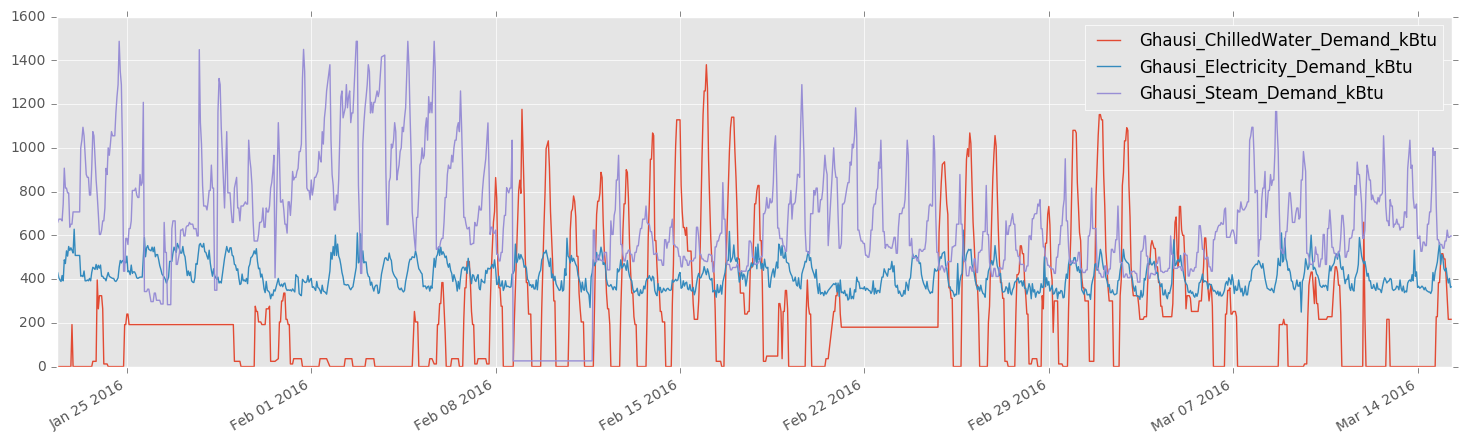

In [13]:
# run the data through data cleaning (can also choose options)
dp=data_preprocessor(dr,
                    
                    runInterpolate=False,
                    
                    runRemoveNA=False,
                   
                    runRemoveOutliers=True,
                   
                    runRemoveOutOfBound=False,
                   
                    runResample=False,
                   
                    runExtendIndex=False,
                   
                    time_res="h",
                   
                    sd_val=3,
                   
                    low_bound=0,
                   
                    high_bound=9998,
                   
                    freq="h"                    
                    
                    )
tSlicer=(slice(None))

dp.data_cleaned.loc[tSlicer,:].plot(figsize=(18,5))

In [17]:
down=pipy_datalink()

In [23]:
temp= down.get_stream_by_point(['Ghausi_Electricity_Demand_kBtu','OAT'],_start="2014",_end="t")#.plot()

Ghausi_Electricity_Demand_kBtu
P09KoOKByvc0-uxyvoTV1UfQdBkAAAVVRJTC1QSS1QXEdIQVVTSV9FTEVDVFJJQ0lUWV9ERU1BTkRfS0JUVQ
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQdBkAAAVVRJTC1QSS1QXEdIQVVTSV9FTEVDVFJJQ0lUWV9ERU1BTkRfS0JUVQ/interpolated
<Response [200]>
OAT
P09KoOKByvc0-uxyvoTV1UfQzo8BAAVVRJTC1QSS1QXE9BVA
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQzo8BAAVVRJTC1QSS1QXE9BVA/interpolated
<Response [200]>


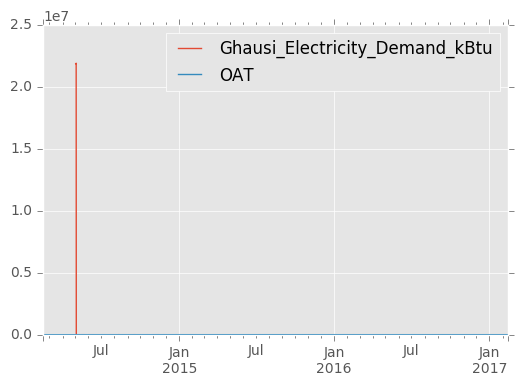

In [24]:
temp.plot()

In [25]:
dp=data_preprocessor(temp,
                    
                    runInterpolate=False,
                    
                    runRemoveNA=False,
                   
                    runRemoveOutliers=True,
                   
                    runRemoveOutOfBound=False,
                   
                    runResample=False,
                   
                    runExtendIndex=False,
                   
                    time_res="h",
                   
                    sd_val=3,
                   
                    low_bound=0,
                   
                    high_bound=9998,
                   
                    freq="h"                    
                    
                    )

debugging
_removeOutliers works


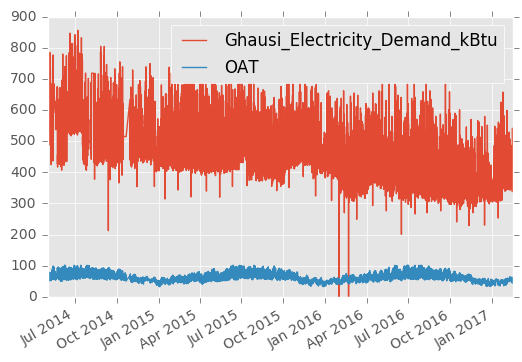

In [29]:
dp.data_cleaned.plot()

In [31]:
# 1 filter data periods
# 2 separate datasets
# 3 separate output and input
# 4 train a model
# 5 get scores for the model = validation
# 6 predict
# 7 compare 

from sklearn import svm, cross_validation, linear_model, preprocessing, ensemble
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [40]:
#1-3
tSlicer=(slice("2014-01","2014-12"))

var= 'Ghausi_Electricity_Demand_kBtu'
dp.data_cleaned.loc[tSlicer,var]#.values



2014-05-03 00:00:00    687.131600
2014-05-03 01:00:00    662.203247
2014-05-03 02:00:00    672.379150
2014-05-03 03:00:00    659.448000
2014-05-03 04:00:00    617.035100
2014-05-03 05:00:00    560.185200
2014-05-03 06:00:00    527.240845
2014-05-03 07:00:00    516.402600
2014-05-03 08:00:00    532.522300
2014-05-03 09:00:00    537.064000
2014-05-03 10:00:00    533.790100
2014-05-03 11:00:00    547.820068
2014-05-03 12:00:00    502.309200
2014-05-03 13:00:00    496.494700
2014-05-03 14:00:00    508.351257
2014-05-03 15:00:00    514.840300
2014-05-03 16:00:00    566.956055
2014-05-03 17:00:00    551.176800
2014-05-03 18:00:00    566.726200
2014-05-03 19:00:00    590.209200
2014-05-03 20:00:00    584.768300
2014-05-03 21:00:00    611.879333
2014-05-03 22:00:00    559.738600
2014-05-03 23:00:00    588.630249
2014-05-04 00:00:00    593.524200
2014-05-04 01:00:00    543.652500
2014-05-04 02:00:00    542.711000
2014-05-04 03:00:00    515.718445
2014-05-04 04:00:00    538.838500
2014-05-04 05:

In [32]:
#4
mod = linear_model.LinearRegression()  
model_coeff.mod.fit() # output, input in np arrays

In [ ]:
#5 model.score(data_train,target_train) same data for training

In [ ]:
#6
model_coeff.predict() # input period 2

In [ ]:
# compare
# real period2 var vs predicted with regression (#6)